<a href="https://colab.research.google.com/github/kingajutrzenka/Spotify-in-progress/blob/main/Unsupervisied_Music_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Music Clustering: Exploring Spotify Tracks with K-Means and DBSCAN 🎶👯‍♀️**

## **Import**

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
maharshipandya__spotify_tracks_dataset_path = kagglehub.dataset_download('maharshipandya/-spotify-tracks-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the '-spotify-tracks-dataset' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/-spotify-tracks-dataset/dataset.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
sns.set_palette("mako")
sns.set_context("paper")
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv("/kaggle/input/-spotify-tracks-dataset/dataset.csv")
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## **Preprocessing**

In [ ]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [ ]:
for col in cat_cols:
  df[col] = df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        113999 non-null  int64   
 1   track_id          113999 non-null  category
 2   artists           113999 non-null  category
 3   album_name        113999 non-null  category
 4   track_name        113999 non-null  category
 5   popularity        113999 non-null  int64   
 6   duration_ms       113999 non-null  int64   
 7   explicit          113999 non-null  bool    
 8   danceability      113999 non-null  float64 
 9   energy            113999 non-null  float64 
 10  key               113999 non-null  int64   
 11  loudness          113999 non-null  float64 
 12  mode              113999 non-null  int64   
 13  speechiness       113999 non-null  float64 
 14  acousticness      113999 non-null  float64 
 15  instrumentalness  113999 non-null  float64 
 16  livenes

In [ ]:
del df["Unnamed: 0"]
del df["track_id"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   artists           113999 non-null  category
 1   album_name        113999 non-null  category
 2   track_name        113999 non-null  category
 3   popularity        113999 non-null  int64   
 4   duration_ms       113999 non-null  int64   
 5   explicit          113999 non-null  bool    
 6   danceability      113999 non-null  float64 
 7   energy            113999 non-null  float64 
 8   key               113999 non-null  int64   
 9   loudness          113999 non-null  float64 
 10  mode              113999 non-null  int64   
 11  speechiness       113999 non-null  float64 
 12  acousticness      113999 non-null  float64 
 13  instrumentalness  113999 non-null  float64 
 14  liveness          113999 non-null  float64 
 15  valence           113999 non-null  float64 
 16  tempo  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,113999.0,33.238827,22.304959,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113999.0,228031.153387,107296.057716,8586.000,174066.0000,212906.000000,261506.0000,5237295.000
danceability,113999.0,0.566801,0.173543,0.000,0.4560,0.580000,0.6950,0.985
energy,113999.0,0.641383,0.251530,0.000,0.4720,0.685000,0.8540,1.000
key,113999.0,5.309126,3.559999,0.000,2.0000,5.000000,8.0000,11.000
loudness,113999.0,-8.258950,5.029357,-49.531,-10.0130,-7.004000,-5.0030,4.532
mode,113999.0,0.637558,0.480708,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113999.0,0.084652,0.105733,0.000,0.0359,0.048900,0.0845,0.965
acousticness,113999.0,0.314907,0.332522,0.000,0.0169,0.169000,0.5975,0.996
instrumentalness,113999.0,0.156051,0.309556,0.000,0.0000,0.000042,0.0490,1.000


In [ ]:
df.describe(include="category").T

,count,unique,top,freq
artists,113999,31437,The Beatles,279
album_name,113999,46589,Alternative Christmas 2022,195
track_name,113999,73608,Run Rudolph Run,151
track_genre,113999,114,acoustic,1000


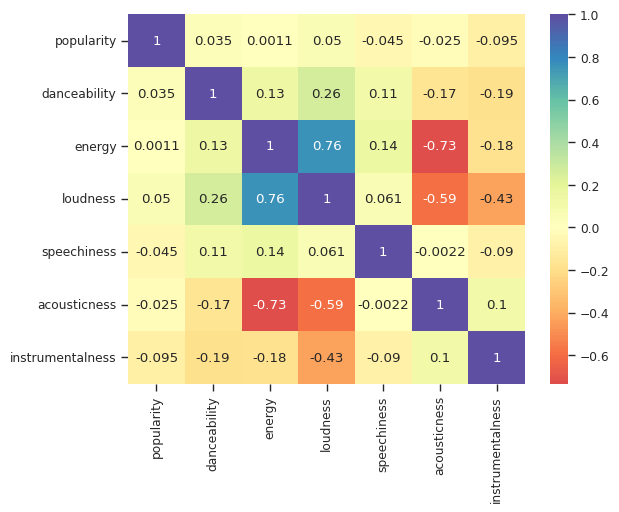

In [ ]:
dfh1 = df[["popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness"]]
corr = dfh1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Spectral", center=0)
plt.show()

In [ ]:
df.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

<Axes: >

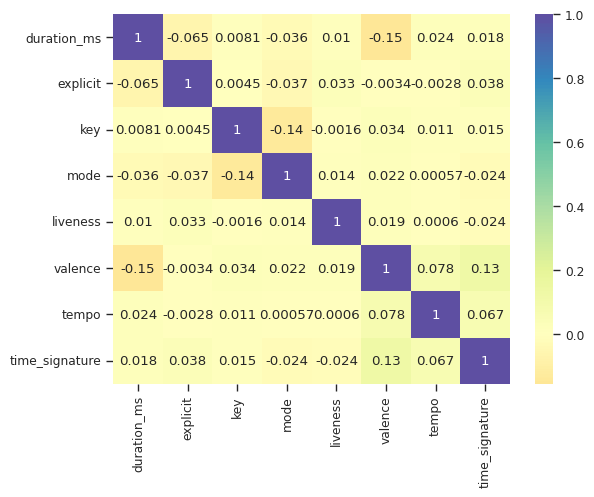

In [ ]:
dfh2 = df[["artists", "album_name", "track_name", "duration_ms",
           "explicit","key", "mode", "liveness", "valence",
           "tempo", "time_signature", "track_genre"]]
corr = dfh2.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Spectral", center=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   artists           113999 non-null  category
 1   album_name        113999 non-null  category
 2   track_name        113999 non-null  category
 3   popularity        113999 non-null  int64   
 4   duration_ms       113999 non-null  int64   
 5   explicit          113999 non-null  bool    
 6   danceability      113999 non-null  float64 
 7   energy            113999 non-null  float64 
 8   key               113999 non-null  int64   
 9   loudness          113999 non-null  float64 
 10  mode              113999 non-null  int64   
 11  speechiness       113999 non-null  float64 
 12  acousticness      113999 non-null  float64 
 13  instrumentalness  113999 non-null  float64 
 14  liveness          113999 non-null  float64 
 15  valence           113999 non-null  float64 
 16  tempo  

In [ ]:
df1 = df.select_dtypes(include=np.number)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  int64  
 1   duration_ms       113999 non-null  int64  
 2   danceability      113999 non-null  float64
 3   energy            113999 non-null  float64
 4   key               113999 non-null  int64  
 5   loudness          113999 non-null  float64
 6   mode              113999 non-null  int64  
 7   speechiness       113999 non-null  float64
 8   acousticness      113999 non-null  float64
 9   instrumentalness  113999 non-null  float64
 10  liveness          113999 non-null  float64
 11  valence           113999 non-null  float64
 12  tempo             113999 non-null  float64
 13  time_signature    113999 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


## **Models**

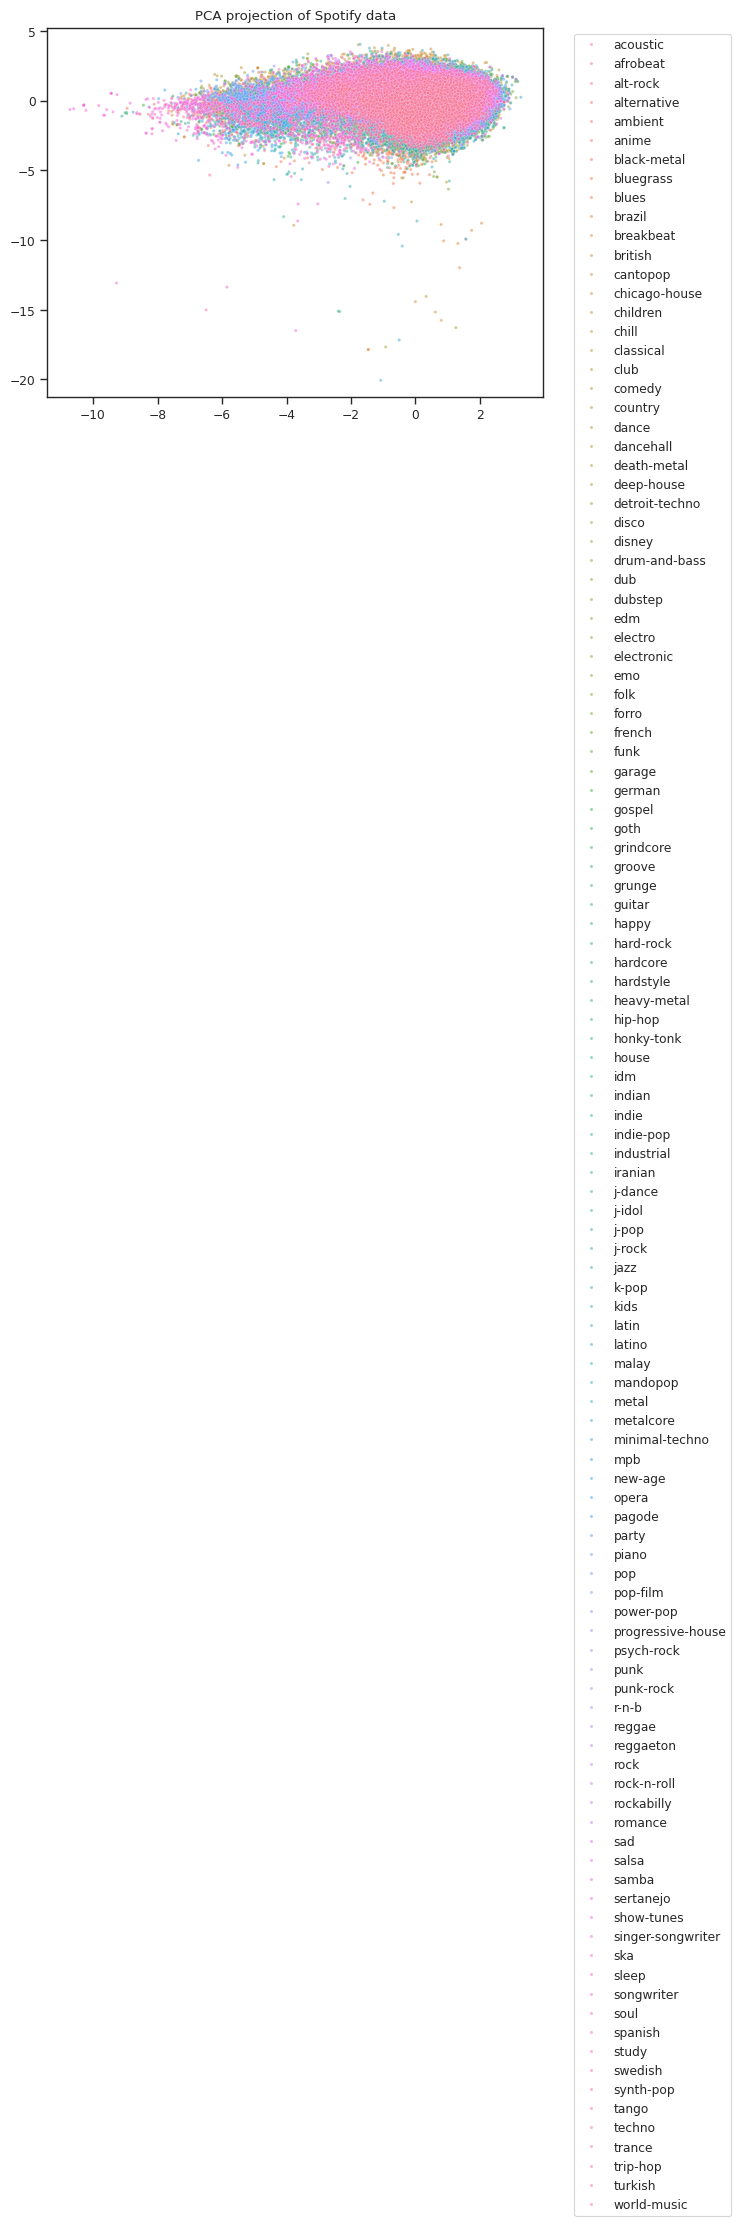

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df1_scaled = StandardScaler().fit_transform(df1)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1_scaled)

# Use Seaborn's scatterplot with hue
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df["track_genre"], s=5, alpha=0.5)
plt.title("PCA projection of Spotify data")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

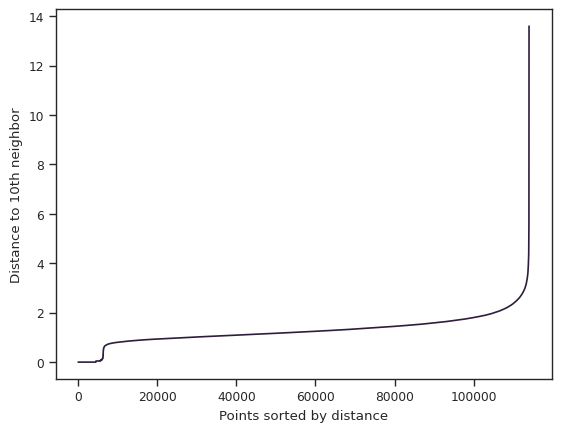

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(df1_scaled)
distances, indices = nbrs.kneighbors(df1_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.ylabel("Distance to 10th neighbor")
plt.xlabel("Points sorted by distance")
plt.show()

In [ ]:
df["track_genre"].value_counts()

,count
track_genre,
acoustic,1000
afrobeat,1000
alt-rock,1000
alternative,1000
ambient,1000
...,...
techno,1000
turkish,1000
trip-hop,1000


In [ ]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=2.2, min_samples=10)
cluster.fit(df1_scaled)

DBSCAN(eps=2.2, min_samples=10)

In [ ]:
from collections import Counter
a = cluster.labels_
label_counts = Counter(a)
print("Cluster labels and their counts:")
for label, count in label_counts.items():
    print(f"Label {label}: {count}")

Cluster labels and their counts:
Label 0: 100600
Label 1: 8243
Label 2: 311
Label 3: 1245
Label -1: 2607
Label 4: 83
Label 5: 10
Label 11: 91
Label 10: 233
Label 6: 139
Label 7: 7
Label 18: 10
Label 14: 10
Label 15: 13
Label 9: 80
Label 8: 195
Label 16: 13
Label 13: 40
Label 12: 12
Label 17: 57


Ultimately, DBSCAN with parameters eps=2.2 and min_samples=10 proved to be the most effective option. This configuration resulted in the identification of 19 distinct clusters and 2,607 points classified as outliers.

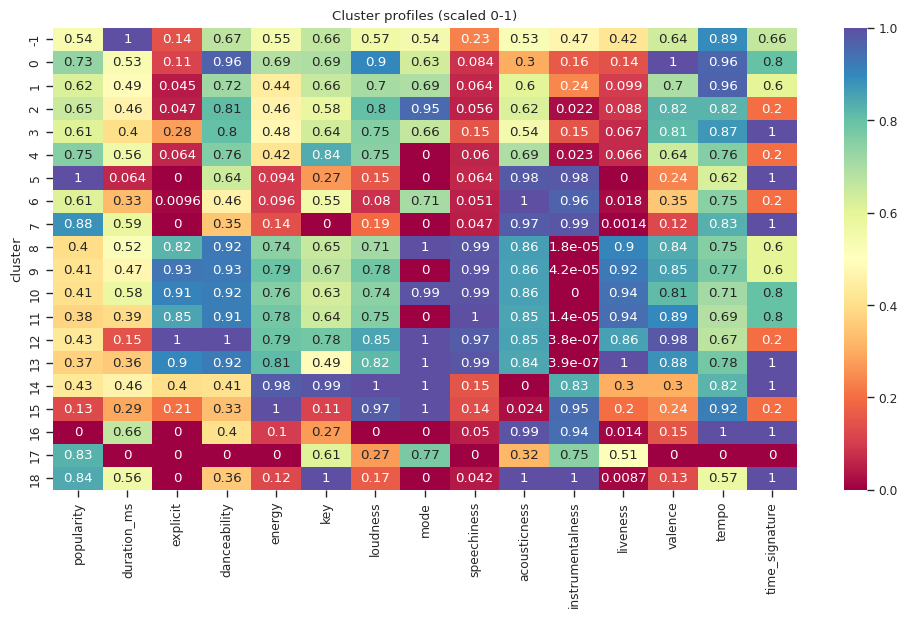

In [ ]:
df["cluster"] = cluster.labels_

cluster_profiles = df.groupby("cluster").mean(numeric_only=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cluster_profiles_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_profiles),
    index=cluster_profiles.index,
    columns=cluster_profiles.columns
)

plt.figure(figsize=(12,6))
sns.heatmap(cluster_profiles_scaled, cmap="Spectral", annot=True)
plt.title("Cluster profiles (scaled 0-1)")
plt.show()

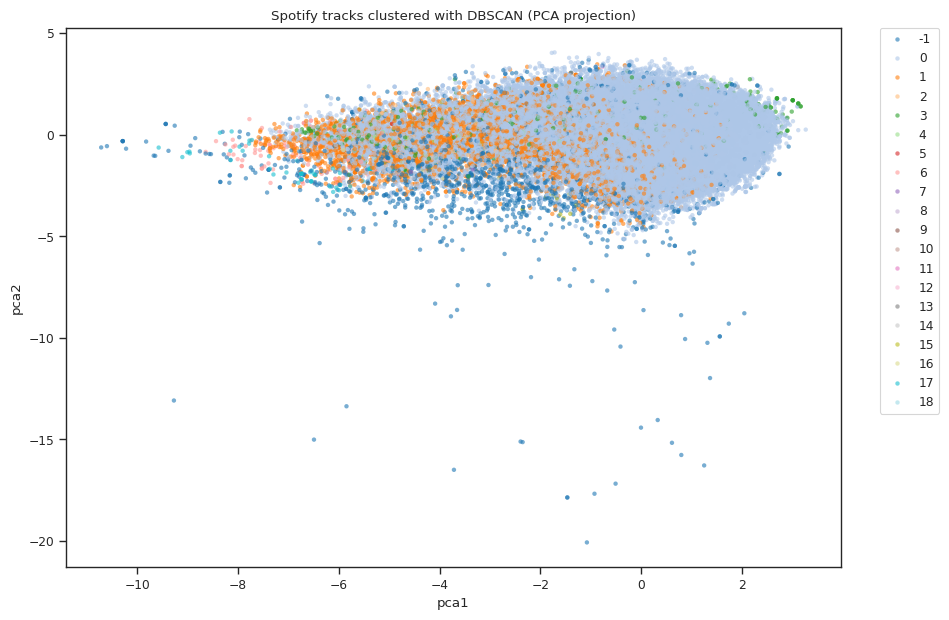

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1_scaled)

df["pca1"] = pca_result[:,0]
df["pca2"] = pca_result[:,1]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca1", y="pca2",
    hue="cluster",
    data=df,
    palette="tab20",
    s=10, alpha=0.6, linewidth=0
)
plt.title("Spotify tracks clustered with DBSCAN (PCA projection)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Description of each cluster:**

Cluster -1 → Outliers, mixed rare tracks.

Cluster 0 → Dance pop / EDM, loud and energetic.

Cluster 1 → Upbeat pop, danceable with high loudness.

Cluster 2 → Pop-rock, energetic and bright.

Cluster 3 → Indie pop, balanced energy and danceability.

Cluster 4 → Acoustic pop, moderate energy.

Cluster 5 → Folk / acoustic ballads, calm and organic.

Cluster 6 → Chill pop, mid-energy, acoustic blend.

Cluster 7 → Experimental niche, rare style.

Cluster 8 → Rap / hip-hop, very high speechiness.

Cluster 9 → Hip-hop core, speech-heavy and energetic.

Cluster 10 → Electronic niche, mid-energy dance tracks.

Cluster 11 → Pop ballads, moderate acousticness.

Cluster 12 → Indie rock, energetic and loud.

Cluster 13 → Pop-rock blend, mid-acoustic, bright.

Cluster 14 → Sad acoustic ballads, low valence.

Cluster 15 → Ambient niche, calm and instrumental.

Cluster 16 → Classical influence, quiet and structured.

Cluster 17 → Mainstream pop average, balanced profile.

Cluster 18 → High-energy experimental, rare cluster.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


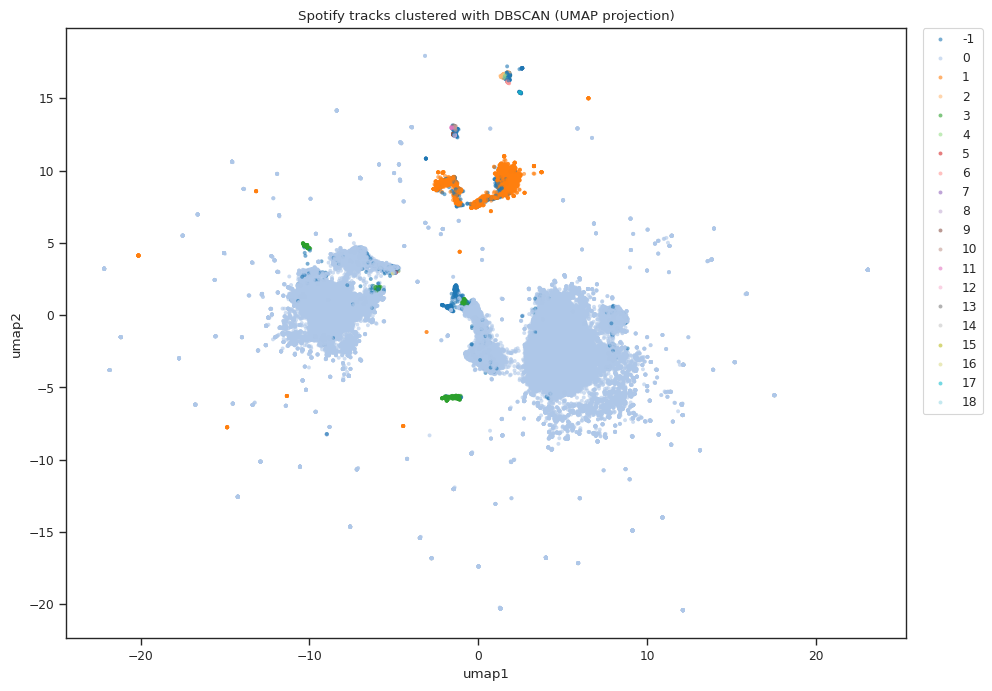

In [ ]:
!pip install umap-learn
import umap.umap_ as umap
umap_model = umap.UMAP(
    n_neighbors=50,
    min_dist=0.1,
    metric="euclidean",
    random_state=42
)

umap_2d = umap_model.fit_transform(df1_scaled)
df["umap1"] = umap_2d[:,0]
df["umap2"] = umap_2d[:,1]

plot_idx = df.sample(n=min(50000, len(df)), random_state=42).index
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df.loc[plot_idx],
    x="umap1", y="umap2",
    hue="cluster", palette="tab20",
    s=8, alpha=0.6, linewidth=0
)
plt.title("Spotify tracks clustered with DBSCAN (UMAP projection)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()

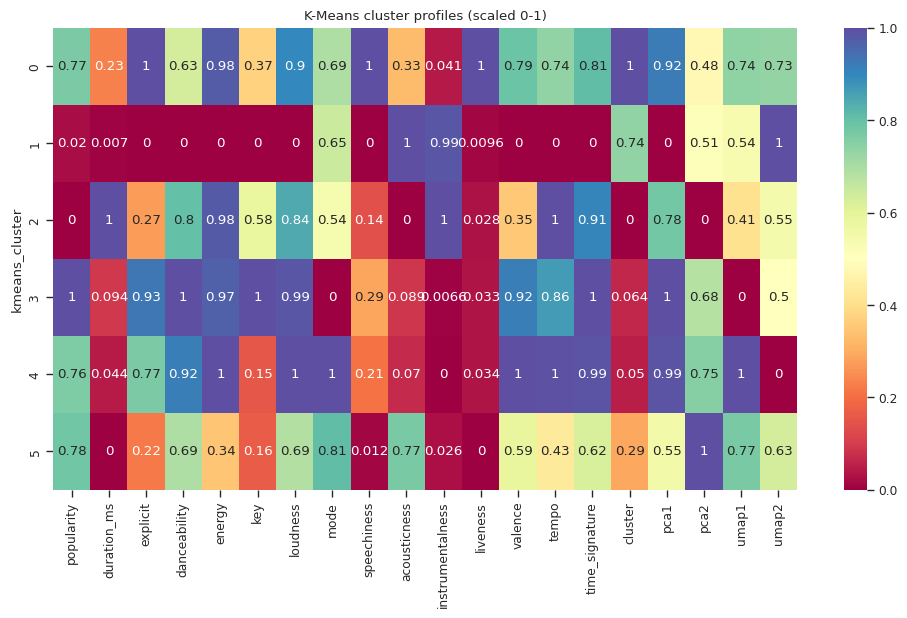

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df["kmeans_cluster"] = kmeans.fit_predict(df1_scaled)

kmeans_profiles = df.groupby("kmeans_cluster").mean(numeric_only=True)

plt.figure(figsize=(12,6))
sns.heatmap(
    kmeans_profiles.apply(lambda x: (x - x.min()) / (x.max() - x.min())),
    cmap="Spectral", annot=True
)
plt.title("K-Means cluster profiles (scaled 0-1)")
plt.show()


In [ ]:
a = kmeans.labels_
label_counts = Counter(a)
print("Cluster labels and their counts:")
for label, count in label_counts.items():
    print(f"Label {label}: {count}")

Cluster labels and their counts:
Label 3: 26407
Label 5: 22476
Label 1: 7590
Label 4: 37706
Label 0: 7899
Label 2: 11921


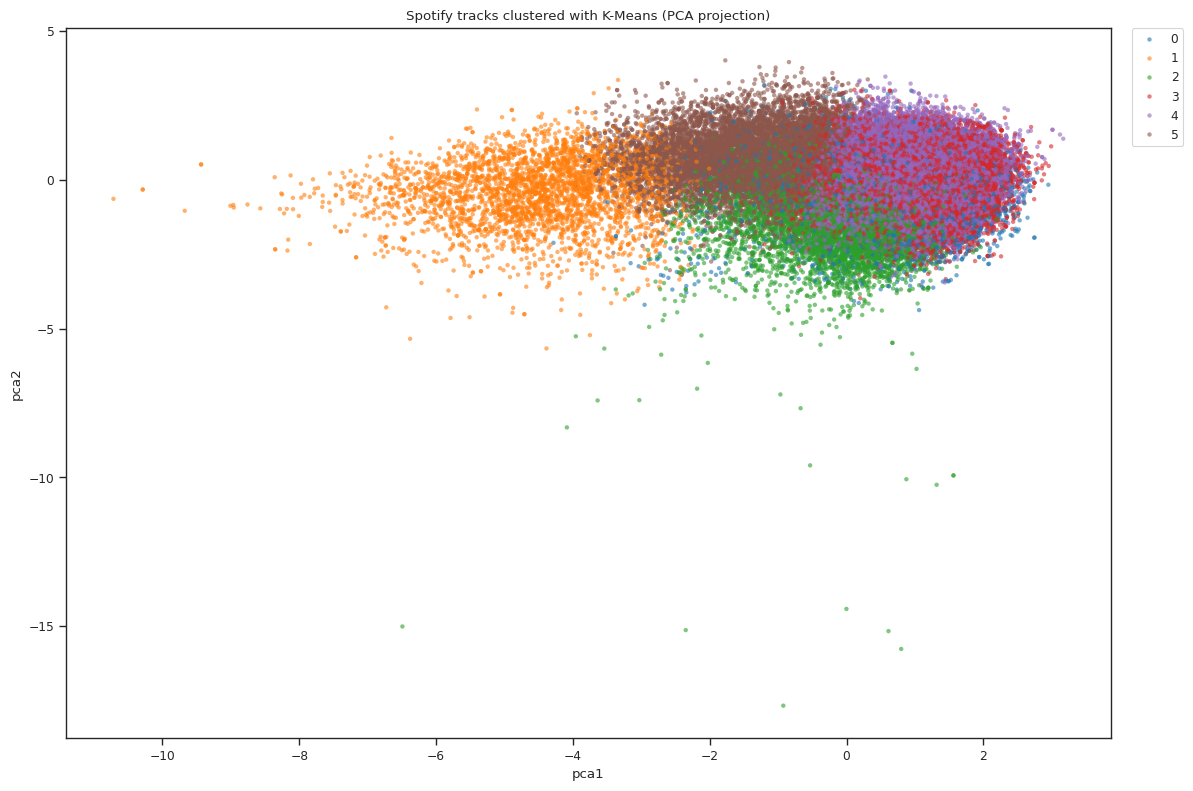

In [ ]:
features = [
    "danceability","energy","loudness","speechiness", "acousticness","instrumentalness","liveness","valence","tempo"]

a = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df1_scaled)
df["pca1"] = pca_result[:,0]
df["pca2"] = pca_result[:,1]

plot_idx = df.sample(n=min(50000, len(df)), random_state=42).index

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df.loc[plot_idx],
    x="pca1", y="pca2",
    hue="kmeans_cluster",
    palette="tab10",
    s=10, alpha=0.6, linewidth=0
)
plt.title("Spotify tracks clustered with K-Means (PCA projection)")
plt.xlabel("pca1"); plt.ylabel("pca2")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()

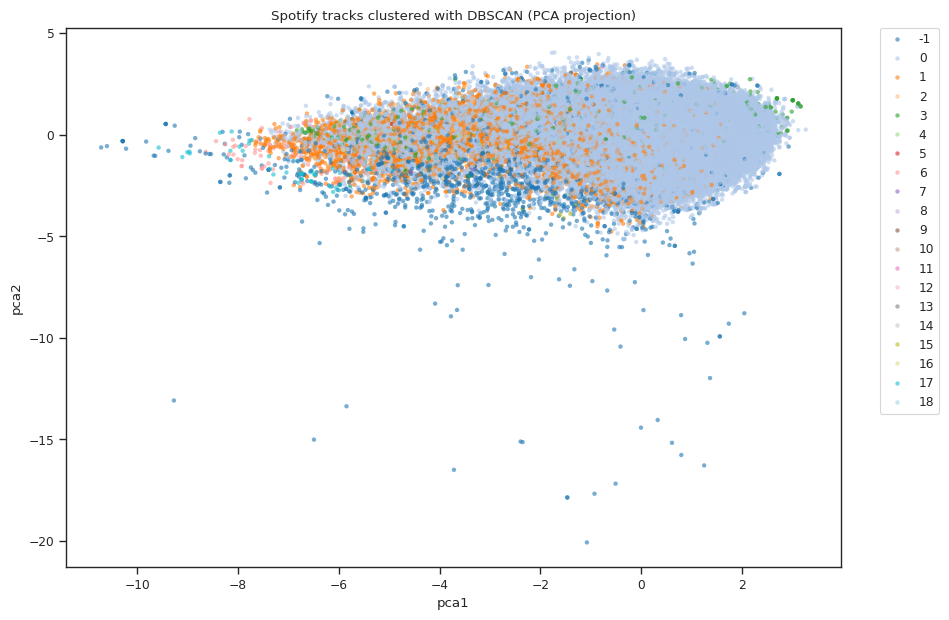

In my opinion, the cluster separation achieved by the K-Means algorithm is superior compared to DBSCAN. However, since K-Means does not include an outlier detection mechanism, it is unsuitable for this particular case study.